In [1]:
import yaml
import uproot
import pandas as pd
import awkward as ak
import polars as pl
import hist
from hist import Hist
import mplhep
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(
    [
        "science",
        "no-latex",
    ]
)


In [2]:
# Load in the data paths from the yaml file
with open("rd_2024_data_turbo.yaml", "r") as f:
    data_paths = yaml.safe_load(f)
with open("JPsiK_branches.yaml", "r") as f:
    branches = yaml.safe_load(f)
ceph_path = "/ceph/RD/2024_tuples/Hlt2RD_BuToKpJpsi_JpsiToMuMu.root"

In [3]:
# Start with one file because for now the data is quite huge and probably not feasable in a jupyter notebook
# dataset = pl.DataFrame()
# for i in range(2):
#     file = uproot.open(f"{data_paths[i]}:Hlt2RD_BuToKpJpsi_JpsiToMuMu/DecayTree")
#     ak_array = file.arrays(library="ak", expressions=branches)
#     data_dict = {key: ak_array[key].to_list() for key in ak_array.fields}
#     pl_dataset = pl.DataFrame(data_dict)
#     dataset.append(pl_dataset)

In [4]:
file = uproot.open(f"{ceph_path}:DecayTree")
ak_array = file.arrays(library="ak", expressions=branches)
data_dict = {key: ak_array[key].to_list() for key in ak_array.fields}
pl_dataset = pl.DataFrame(data_dict)

In [5]:
pl_dataset["B_DTF_PV_B_PT"]

shape: (2_159_585,)
Series: 'B_DTF_PV_B_PT' [f64]
[
	1214.214355
	24185.982422
	7256.572754
	382.585205
	4157.855469
	…
	2757.251953
	3270.08374
	2855.878906
	6463.970215
	8930.592773
]

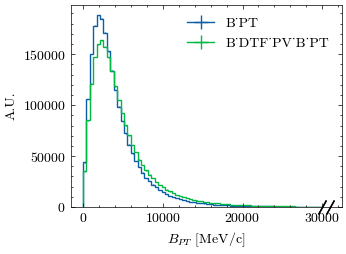

In [6]:
# now make a histogram using hist and plot B_DTF_PV_B_PT as well as B_PT from the dataset
# This is a 1D histogram
histogram_1 = Hist(
    hist.axis.Regular(70, 0, 30_000, label="B_PT"), # bins, start, stop, name
).fill(pl_dataset["B_PT"])
histogram_2 = Hist(
    hist.axis.Regular(70, 0, 30_000, label="B_DTF_PV_B_PT"), # bins, start, stop, name
).fill(pl_dataset["B_DTF_PV_B_PT"])

fig = plt.figure()
mplhep.histplot(histogram_1, label="B_PT")
mplhep.histplot(histogram_2, label="B_DTF_PV_B_PT")
plt.ylabel("A.U.")
plt.xlabel(r"$B_{PT}$ [MeV/c]")
plt.legend()

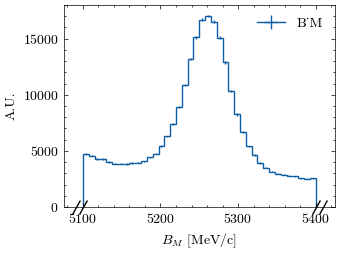

In [7]:
histogram_1 = Hist(
    hist.axis.Regular(40, 5_100, 5_400, label="B_M"), # bins, start, stop, name
).fill(pl_dataset["B_M"])
histogram_2 = Hist(
    hist.axis.Regular(50, 5_278, 5_287, label="B_DTF_PV_B_M"), # bins, start, stop, name
).fill(pl_dataset["B_DTF_PV_B_M"])

fig = plt.figure()
mplhep.histplot(histogram_1, label="B_M")
#mplhep.histplot(histogram_2, label="B_DTF_PV_B_M")
plt.ylabel("A.U.")
plt.xlabel(r"$B_{M}$ [MeV/c]")
plt.legend()

In [8]:
pl_dataset["B_DTF_PV_BPVLTIME"].min()

-0.026284784078598022

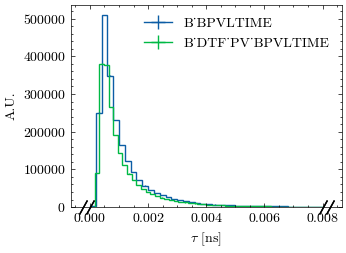

In [9]:
histogram_1 = Hist(
    hist.axis.Regular(40, 0 , 0.008, label="B_BPVLTIME"), # bins, start, stop, name
).fill(pl_dataset["B_BPVLTIME"])
histogram_2 = Hist(
    hist.axis.Regular(50, 0, 0.008, label="B_DTF_PV_BPVLTIME"), # bins, start, stop, name
).fill(pl_dataset["B_DTF_PV_BPVLTIME"])

fig = plt.figure()
mplhep.histplot(histogram_1, label="B_BPVLTIME")
mplhep.histplot(histogram_2, label="B_DTF_PV_BPVLTIME")
plt.ylabel("A.U.")
plt.xlabel(r"$\tau$ [ns]")
plt.legend()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f037de31900>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f037dfdda20>, text=[])

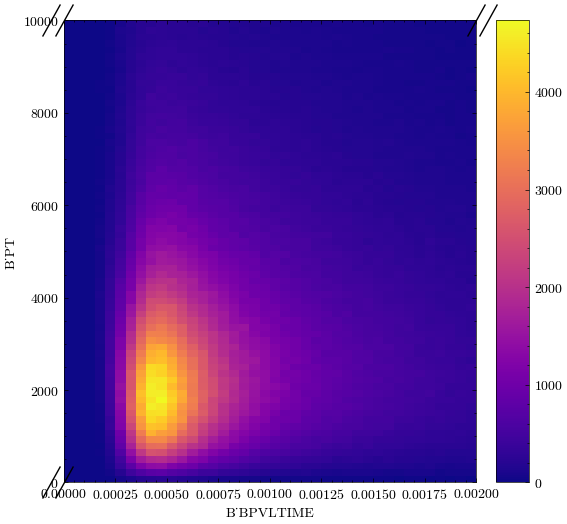

In [10]:
twoD_hist = Hist(
    hist.axis.Regular(40, 0 , 0.002, label="B_BPVLTIME"), # bins, start, stop, name
    hist.axis.Regular(70, 0, 10_000, label="B_PT"), # bins, start, stop, name
).fill(pl_dataset["B_BPVLTIME"], pl_dataset["B_PT"])
fig, ax = plt.subplots(figsize=(6, 6))
twoD_hist.plot2d(ax=ax, cmap="plasma")


In [11]:
unique_fills = pl_dataset["FillNumber"].unique()

In [12]:
unique_fills.to_list()

[9479,
 9483,
 9485,
 9496,
 9509,
 9510,
 9512,
 9514,
 9517,
 9518,
 9519,
 9521,
 9523,
 9525,
 9537,
 9543,
 9548,
 9549,
 9559,
 9562,
 9564,
 9565,
 9566,
 9567,
 9568,
 9569,
 9570,
 9573,
 9574]

In [26]:
print(len(pl_dataset))
print(pl_dataset["B_Hlt1TrackMVADecision_TIS"].sum())
print(pl_dataset["B_Hlt1TrackMVADecision_TOS"].sum())

2159585
116304
577491


In [20]:
pl_dataset["B_Hlt1TrackMVADecision_TIS"].cast(pl.Int32).mean()

0.05385479154559788

In [21]:
pl_dataset["B_Hlt1TrackMVADecision_TOS"].cast(pl.Int32).mean()

0.2674083215062153

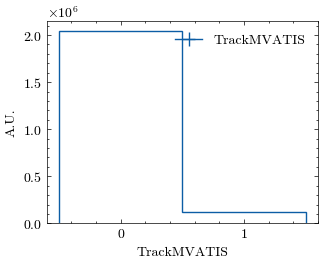

In [34]:
TIS_hist = Hist(
    hist.axis.Integer(0, 2, underflow=False, overflow=False), # bins, start, stop, name
).fill(pl_dataset["B_Hlt1TrackMVADecision_TIS"])
fig = plt.figure()
mplhep.histplot(TIS_hist, label="TrackMVATIS")
plt.ylabel("A.U.")
plt.xlabel(r"TrackMVATIS")
plt.legend()


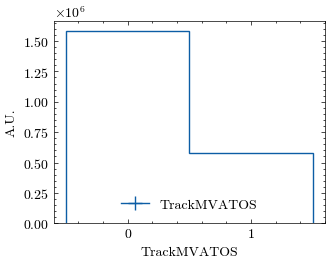

In [33]:
TIS_hist = Hist(
    hist.axis.Integer(0, 2, underflow=False, overflow=False), # bins, start, stop, name
).fill(pl_dataset["B_Hlt1TrackMVADecision_TOS"])
fig = plt.figure()
mplhep.histplot(TIS_hist, label="TrackMVATOS")
plt.ylabel("A.U.")
plt.xlabel(r"TrackMVATOS")
plt.legend()


In [30]:
TIS_hist[0]

2043281.0

In [37]:
stored_lumi_values = [
    83.02, 77.28, 865.63, 219.57, 345.65, 756.04, 8786.62, 8050.82, 646.82, 
    3913.87, 1677.24, 381.12, 6049.02, 6346.85, 4887.31, 13793.90, 40976.23, 
    2086.22, 10005.90, 12662.78, 9945.00, 20762.81, 8029.57, 19346.36, 41103.62, 
    10104.50, 27897.78, 23299.64, 46109.06
]

sum_stored_lumi = sum(stored_lumi_values)
sum_stored_lumi


329210.23

In [40]:
stored_lumi_all = [
46_109.06,
23_299.64,
27_897.78,
10_104.50,
41_103.62,
19_346.36,
8_029.57,
20_762.81,
9_945.00,
12_662.78,
10_005.90,
2_086.22,
40_976.23,
13_793.90,
4_887.31,
6_346.85,
6_049.02,
381.12,
1_677.24,
3_913.87,
646.82,
8_050.82,
8_786.62,
756.04,
345.65,
219.57,
865.63,
77.28,
83.02,
]

# Calculate the sum
total_sum_stored_lumi = sum(stored_lumi_all)
total_sum_stored_lumi

329210.2300000001